<a href="https://colab.research.google.com/github/yiwenwangANU/Machine_Learning/blob/main/04_Transfer_Learning_Fine_Turning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/yiwenwangANU/MachineLearningTools/master/helperfunctions.py

--2022-05-25 03:39:48--  https://raw.githubusercontent.com/yiwenwangANU/MachineLearningTools/master/helperfunctions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3007 (2.9K) [text/plain]
Saving to: ‘helperfunctions.py’

helperfunctions.py  100%[===================>]   2.94K  --.-KB/s    in 0s      

2022-05-25 03:39:48 (50.3 MB/s) - ‘helperfunctions.py’ saved [3007/3007]



In [ ]:
from helperfunctions import unzip_data, walk_through_dir, plot_random_image, create_tensorboard_callback, plot_loss_curve

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2022-05-25 03:39:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.98.128, 142.251.107.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  87.3MB/s    in 1.8s    

2022-05-25 03:39:53 (87.3 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

Current directory: 10_food_classes_10_percent, number of sub-directories: 2, number of files: 0
Current directory: 10_food_classes_10_percent/train, number of sub-directories: 10, number of files: 0
Current directory: 10_food_classes_10_percent/train/sushi, number of sub-directories: 0, number of files: 75
Current directory: 10_food_classes_10_percent/train/pizza, number of sub-directories: 0, number of files: 75
Current directory: 10_food_classes_10_percent/train/chicken_curry, number of sub-directories: 0, number of files: 75
Current directory: 10_food_classes_10_percent/train/fried_rice, number of sub-directories: 0, number of files: 75
Current directory: 10_food_classes_10_percent/train/ice_cream, number of sub-directories: 0, number of files: 75
Current directory: 10_food_classes_10_percent/train/grilled_salmon, number of sub-directories: 0, number of files: 75
Current directory: 10_food_classes_10_percent/train/chicken_wings, number of sub-directories: 0, number of files: 75
Curr

In [ ]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

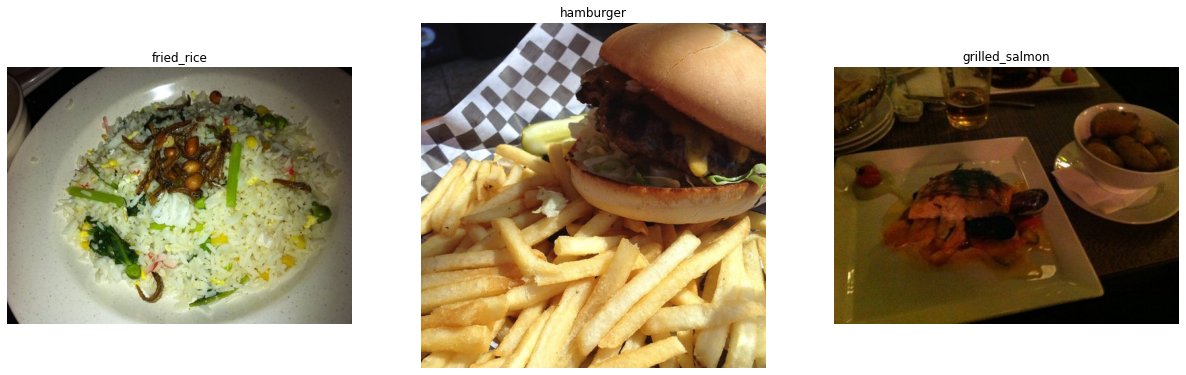

In [ ]:
plot_random_image(train_dir, 3)

In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE =32

In [ ]:
train_data_10_percent = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)
test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[2.54668365e+02 2.54854904e+02 2.52151001e+02]
   [2.48119263e+02 2.44964600e+02 2.44160400e+02]
   [2.35883301e+02 2.13092468e+02 2.12175385e+02]
   ...
   [1.82643570e+02 2.02330765e+02 2.03413422e+02]
   [2.32197495e+02 2.48051559e+02 2.55000000e+02]
   [2.45836395e+02 2.51422867e+02 2.53797836e+02]]

  [[2.51315201e+02 2.53316010e+02 2.51232788e+02]
   [2.52973221e+02 2.54794968e+02 2.54319366e+02]
   [2.54273911e+02 2.42941635e+02 2.41487091e+02]
   ...
   [1.98160019e+02 2.08669418e+02 2.15176956e+02]
   [2.44372986e+02 2.52578156e+02 2.54937805e+02]
   [2.50619446e+02 2.53631134e+02 2.44942154e+02]]

  [[2.48930008e+02 2.52635834e+02 2.51537781e+02]
   [2.50973373e+02 2.54921555e+02 2.54647003e+02]
   [2.53134567e+02 2.53882172e+02 2.51666458e+02]
   ...
   [1.96730728e+02 2.03730728e+02 2.10279831e+02]
   [2.45539459e+02 2.50448410e+02 2.53613525e+02]
   [2.53004196e+02 2.54823517e+02 2.47720947e+02]]

  ...

  [[2.46579773e+02 2.28008041e+02 2.28467407e+02]
   [2

## Model 0: Building a transfer learning model using keras functional api

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

x = base_model(inputs)
print(x.shape)

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

16719872/16705208 [==============================] - 0s 0us/step
(None, 7, 7, 1280)


In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_0 = model_0.fit(train_data_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data,
                        validation_steps=int(0.25*len(test_data)),
                        callbacks=[create_tensorboard_callback("transfer_learning",
                                                               "10_percent_feature_extraction")],)

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20220525-034008
Epoch 1/5
24/24 [==============================] - 25s 229ms/step - loss: 1.9113 - accuracy: 0.3920 - val_loss: 1.3595 - val_accuracy: 0.7319
Epoch 2/5
24/24 [==============================] - 5s 184ms/step - loss: 1.1524 - accuracy: 0.7507 - val_loss: 0.9420 - val_accuracy: 0.7862
Epoch 3/5
24/24 [==============================] - 5s 184ms/step - loss: 0.8381 - accuracy: 0.8027 - val_loss: 0.7476 - val_accuracy: 0.8339
Epoch 4/5
24/24 [==============================] - 4s 146ms/step - loss: 0.6759 - accuracy: 0.8440 - val_loss: 0.6502 - val_accuracy: 0.8405
Epoch 5/5
24/24 [==============================] - 5s 184ms/step - loss: 0.5934 - accuracy: 0.8667 - val_loss: 0.5991 - val_accuracy: 0.8503


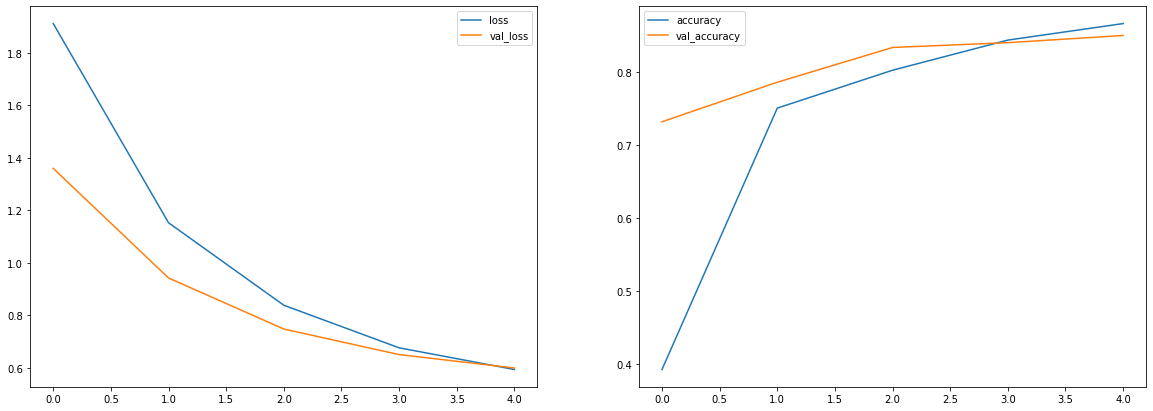

In [ ]:
plot_loss_curve(history_0)

In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 8s 92ms/step - loss: 0.6129 - accuracy: 0.8368


[0.6128513216972351, 0.8367999792098999]

In [ ]:
input_shape = (1, 4, 4, 3)
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
input_tensor



<tf.Tensor: shape=(1, 4, 4, 3), dtype=float32, numpy=
array([[[[ 0.3274685 , -0.8426258 ,  0.3194337 ],
         [-1.4075519 , -2.3880599 , -1.0392479 ],
         [-0.5573232 ,  0.539707  ,  1.6994323 ],
         [ 0.28893656, -1.5066116 , -0.2645474 ]],

        [[-0.59722406, -1.9171132 , -0.62044144],
         [ 0.8504023 , -0.40604794, -3.0258412 ],
         [ 0.9058464 ,  0.29855987, -0.22561555],
         [-0.7616443 , -1.8917141 , -0.93847126]],

        [[ 0.77852213, -0.47338897,  0.97772694],
         [ 0.24694404,  0.20573747, -0.5256233 ],
         [ 0.32410017,  0.02545409, -0.10638497],
         [-0.6369475 ,  1.1603122 ,  0.2507359 ]],

        [[-0.41728503,  0.4012578 , -1.4145443 ],
         [-0.5931857 , -1.6617213 ,  0.33567193],
         [ 0.10815629,  0.23479682, -0.56668764],
         [-0.35819843,  0.88698614,  0.52744764]]]], dtype=float32)>

In [ ]:
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
global_average_pooled_tensor

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [ ]:
global_max_pooled_tensor = tf.keras.layers.GlobalMaxPool2D()(input_tensor)
global_max_pooled_tensor

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2022-05-25 03:55:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 108.177.12.128, 172.217.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   132MB/s    in 1.0s    

2022-05-25 03:55:03 (132 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
train_dir = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                           batch_size=BATCH_SIZE,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                batch_size=BATCH_SIZE,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  #preprocessing.Rescaling(1./255)                                         
], name = "data_agumentation")

(-0.5, 511.5, 545.5, -0.5)

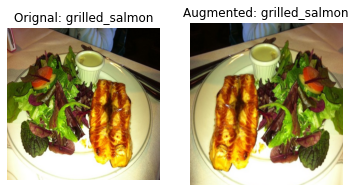

In [ ]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

random_class = random.choice(train_data_1_percent.class_names)
image_name = random.choice(os.listdir(os.path.join(train_dir, random_class)))
image_path = os.path.join(train_dir, random_class, image_name)
img = mpimg.imread(image_path)
img_aug = data_augmentation(img, training=True)/255.

plt.subplot(1, 2, 1)
plt.axis("off")
plt.title(f"Orignal: {random_class}")
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title(f"Augmented: {random_class}")
plt.imshow(img_aug)
plt.axis("off")

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

input_layer = layers.Input(shape=(224, 224, 3))
x = data_augmentation(input_layer)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output_layer = layers.Dense(10, activation="softmax")(x)

model_1 = tf.keras.Model(input_layer, output_layer)

model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20220525-043038
Epoch 1/5
3/3 [==============================] - 10s 2s/step - loss: 2.4475 - accuracy: 0.0714 - val_loss: 2.2797 - val_accuracy: 0.1908
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 2.2155 - accuracy: 0.1857 - val_loss: 2.1426 - val_accuracy: 0.2533
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.9847 - accuracy: 0.4143 - val_loss: 2.0476 - val_accuracy: 0.3224
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.7681 - accuracy: 0.5000 - val_loss: 1.9327 - val_accuracy: 0.3783
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.6235 - accuracy: 0.6143 - val_loss: 1.8560 - val_accuracy: 0.4293


In [ ]:
model_1.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 data_agumentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_7   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

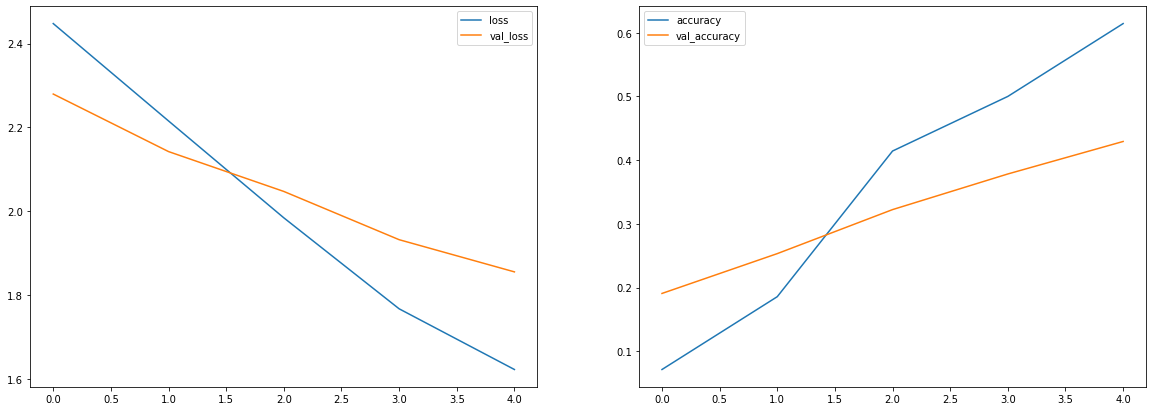

In [ ]:
plot_loss_curve(history_1_percent)

In [ ]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                            batch_size=BATCH_SIZE,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical")
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                batch_size=BATCH_SIZE,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2)                                        
])

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

input_layer = tf.keras.layers.Input(shape=(224, 224, 3))
x = data_augmentation(input_layer)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output_layer = tf.keras.layers.Dense(10, activation="softmax")(x)

model_2 = tf.keras.Model(input_layer, output_layer)

In [ ]:
initial_epochs = 5
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_10_percent = model_2.fit(train_data_10_percent,
                                 epochs=initial_epochs,
                                 batch_size=BATCH_SIZE,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data,
                                 validation_steps=int(0.25*len(test_data)),
                                 callbacks=[create_tensorboard_callback(
                                     "transfer_learning",
                                     "10_percent_data_aug"
                                 ), checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20220525-053530
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 0.3217 - accuracy: 0.9147
Epoch 1: val_loss improved from inf to 0.50689, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 14s 332ms/step - loss: 0.3217 - accuracy: 0.9147 - val_loss: 0.5069 - val_accuracy: 0.8372
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 0.2865 - accuracy: 0.9373
Epoch 2: val_loss improved from 0.50689 to 0.46998, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 8s 310ms/step - loss: 0.2865 - accuracy: 0.9373 - val_loss: 0.4700 - val_accuracy: 0.8536
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.2758 - accuracy: 0.9360
Epoch 3: val_loss improved from 0.46998 to 0.46065, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 0.4761 - accuracy: 0.8444


[0.47611474990844727, 0.8443999886512756]

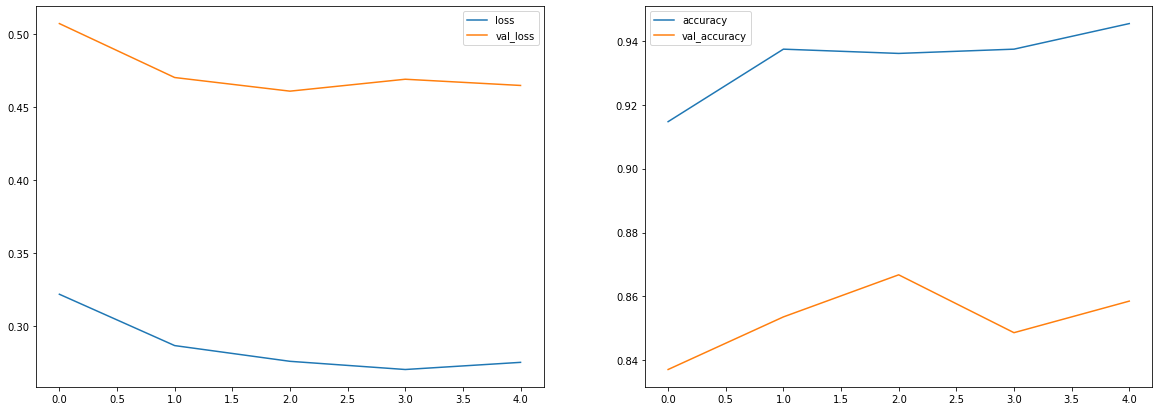

In [ ]:
plot_loss_curve(history_10_percent)

In [ ]:
model_2.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_9   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_7 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
____________________________________________

#ModelCheckPoint callback

In [ ]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

In [ ]:
# Load in checkpoint weights
model_2.load_weights(checkpoint_path)

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.4726 - accuracy: 0.8468


[0.4726213812828064, 0.8468000292778015]